In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split


RANDOM_SEED = 42
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()
df.head()
df.info()
N_TIME_STEPS = 90
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

D:\annoconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
user         1098203 non-null int64
activity     1098203 non-null object
timestamp    1098203 non-null int64
x-axis       1098203 non-null float64
y-axis       1098203 non-null float64
z-axis       1098203 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


D:\annoconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
history = pickle.load(open("history2.p", "rb"))
predictions = pickle.load(open("predictions2.p", "rb"))

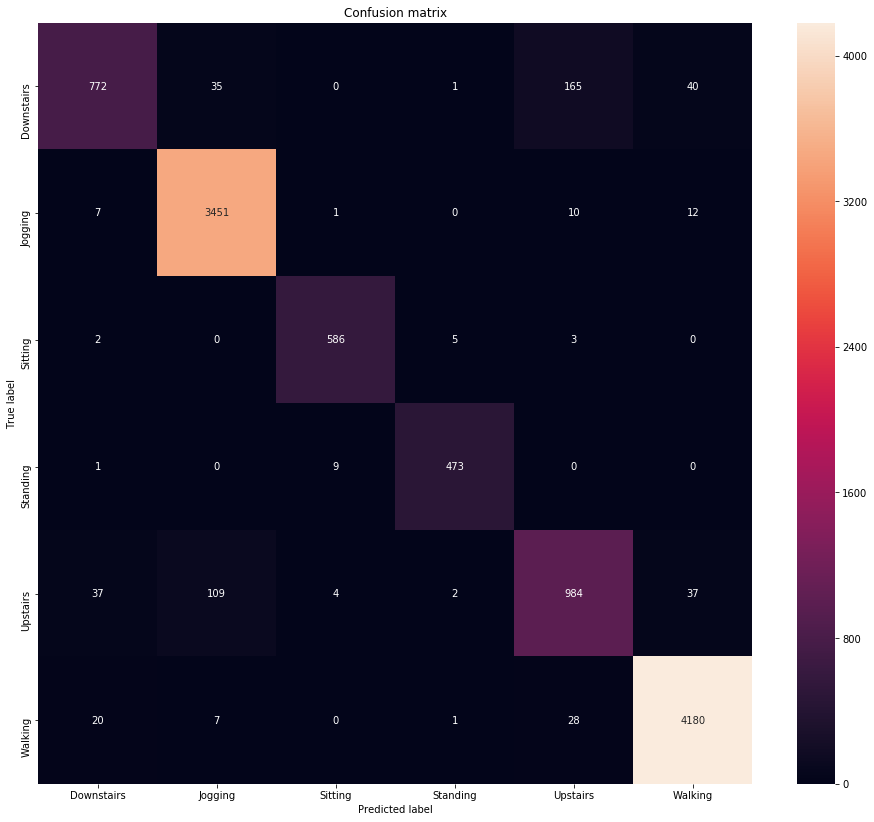

In [3]:
LABELS = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [4]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
fwscore=metrics.f1_score(max_test, max_predictions,average='weighted')
print(fwscore)

0.9501739028258602


In [5]:
print(metrics.classification_report(max_test, max_predictions, target_names=LABELS))

             precision    recall  f1-score   support

 Downstairs       0.92      0.76      0.83      1013
    Jogging       0.96      0.99      0.97      3481
    Sitting       0.98      0.98      0.98       596
   Standing       0.98      0.98      0.98       483
   Upstairs       0.83      0.84      0.83      1173
    Walking       0.98      0.99      0.98      4236

avg / total       0.95      0.95      0.95     10982



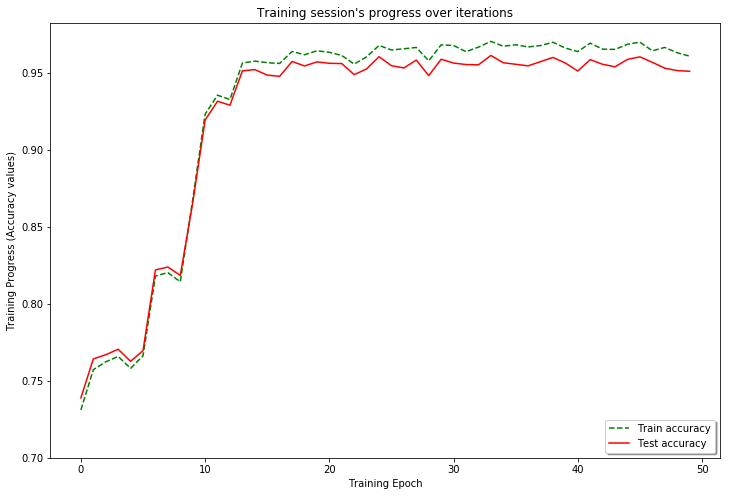

In [6]:
plt.figure(figsize=(12, 8))

#plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

#plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "r-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='lower right', shadow=True)
#plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.ylabel('Training Progress (Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0.7)

plt.show()

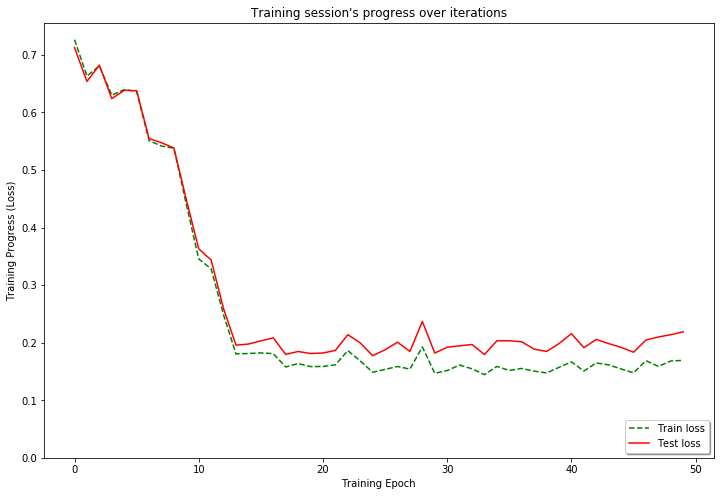

In [7]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "g--", label="Train loss")
#plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
#plt.plot(np.array(history['test_acc']), "r-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='lower right', shadow=True)
plt.ylabel('Training Progress (Loss)')
#plt.ylabel('Training Progress (Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()